In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import *
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Slowest task Impact

In [2]:
dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)
dataWrangler = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)

In [3]:
dataCO0 = dataComet[dataComet['Optimization']==0].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO1 = dataComet[dataComet['Optimization']==1].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO2 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO3 = dataComet[dataComet['Optimization']==3].drop(['Optimization'],axis=1).reset_index(drop='index')

dataWO0 = dataWrangler[dataWrangler['Optimization']==0].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO1 = dataWrangler[dataWrangler['Optimization']==1].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO2 = dataWrangler[dataWrangler['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO3 = dataWrangler[dataWrangler['Optimization']==3].drop(['Optimization'],axis=1).reset_index(drop='index')

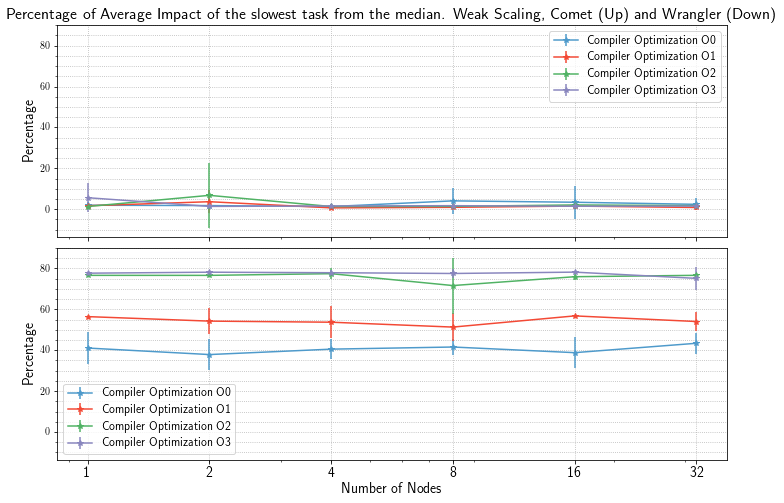

In [4]:
impactCO0 = slowest_impact(dataCO0,nodes=[1,2,4,8,16,32],center='median')
impactCO1 = slowest_impact(dataCO1,nodes=[1,2,4,8,16,32],center='median')
impactCO2 = slowest_impact(dataCO2,nodes=[1,2,4,8,16,32],center='median')
impactCO3 = slowest_impact(dataCO3,nodes=[1,2,4,8,16,32],center='median')

impactWO0 = slowest_impact(dataWO0,nodes=[1,2,4,8,16,32],center='median')
impactWO1 = slowest_impact(dataWO1,nodes=[1,2,4,8,16,32],center='median')
impactWO2 = slowest_impact(dataWO2,nodes=[1,2,4,8,16,32],center='median')
impactWO3 = slowest_impact(dataWO3,nodes=[1,2,4,8,16,32],center='median')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO0],yerr=[np.std(D)*100 for D in impactCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO1],yerr=[np.std(D)*100 for D in impactCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO2],yerr=[np.std(D)*100 for D in impactCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO3],yerr=[np.std(D)*100 for D in impactCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO0],yerr=[np.std(D)*100 for D in impactWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO1],yerr=[np.std(D)*100 for D in impactWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO2],yerr=[np.std(D)*100 for D in impactWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO3],yerr=[np.std(D)*100 for D in impactWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Percentage',fontsize=14)
axes[1].set_ylabel('Percentage',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Percentage of Average Impact of the slowest task from the median. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


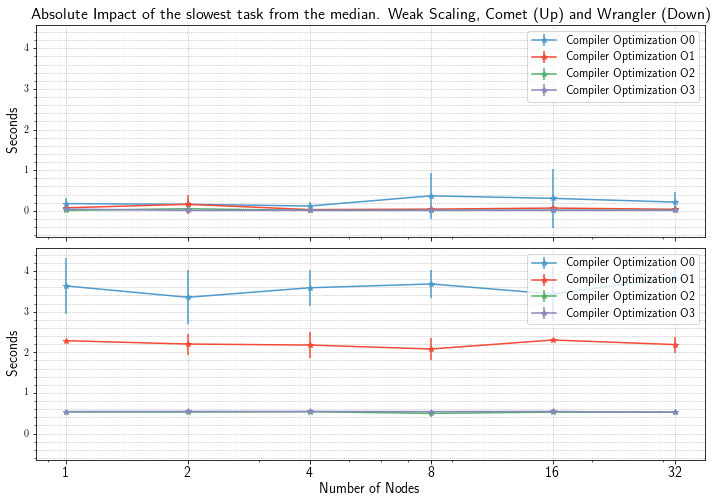

In [5]:
impactCO0 = slowest_impact(dataCO0,nodes=[1,2,4,8,16,32],center='medianabs')
impactCO1 = slowest_impact(dataCO1,nodes=[1,2,4,8,16,32],center='medianabs')
impactCO2 = slowest_impact(dataCO2,nodes=[1,2,4,8,16,32],center='medianabs')
impactCO3 = slowest_impact(dataCO3,nodes=[1,2,4,8,16,32],center='medianabs')

impactWO0 = slowest_impact(dataWO0,nodes=[1,2,4,8,16,32],center='medianabs')
impactWO1 = slowest_impact(dataWO1,nodes=[1,2,4,8,16,32],center='medianabs')
impactWO2 = slowest_impact(dataWO2,nodes=[1,2,4,8,16,32],center='medianabs')
impactWO3 = slowest_impact(dataWO3,nodes=[1,2,4,8,16,32],center='medianabs')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO0],yerr=[np.std(D) for D in impactCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO1],yerr=[np.std(D) for D in impactCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO2],yerr=[np.std(D) for D in impactCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO3],yerr=[np.std(D) for D in impactCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO0],yerr=[np.std(D) for D in impactWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO1],yerr=[np.std(D) for D in impactWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO2],yerr=[np.std(D) for D in impactWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO3],yerr=[np.std(D) for D in impactWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Absolute Impact of the slowest task from the median. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


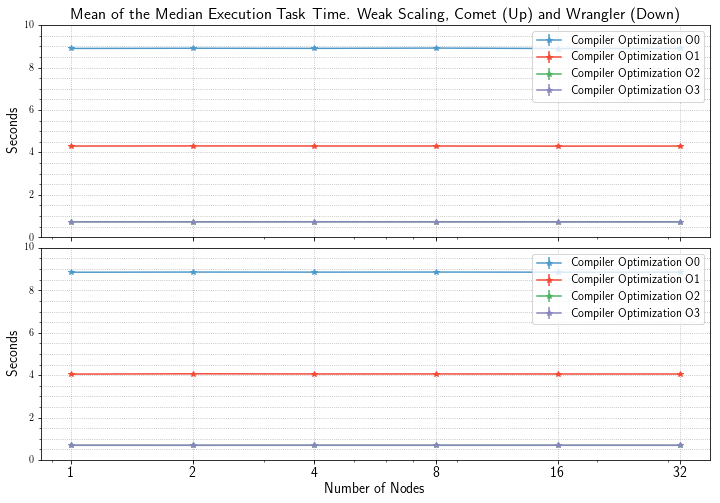

In [6]:
centersCO0 = task_centers(dataCO0,nodes=[1,2,4,8,16,32],measure='median')
centersCO1 = task_centers(dataCO1,nodes=[1,2,4,8,16,32],measure='median')
centersCO2 = task_centers(dataCO2,nodes=[1,2,4,8,16,32],measure='median')
centersCO3 = task_centers(dataCO3,nodes=[1,2,4,8,16,32],measure='median')
centersWO0 = task_centers(dataWO0,nodes=[1,2,4,8,16,32],measure='median')
centersWO1 = task_centers(dataWO1,nodes=[1,2,4,8,16,32],measure='median')
centersWO2 = task_centers(dataWO2,nodes=[1,2,4,8,16,32],measure='median')
centersWO3 = task_centers(dataWO3,nodes=[1,2,4,8,16,32],measure='median')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO0],yerr=[np.std(D)/1000000.0 for D in centersCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO1],yerr=[np.std(D)/1000000.0 for D in centersCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO2],yerr=[np.std(D)/1000000.0 for D in centersCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO3],yerr=[np.std(D)/1000000.0 for D in centersCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO0],yerr=[np.std(D)/1000000.0 for D in centersWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO1],yerr=[np.std(D)/1000000.0 for D in centersWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO2],yerr=[np.std(D)/1000000.0 for D in centersWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO3],yerr=[np.std(D)/1000000.0 for D in centersWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[0].set_ylim([0,10])
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean of the Median Execution Task Time. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


## Average coefficient of variation

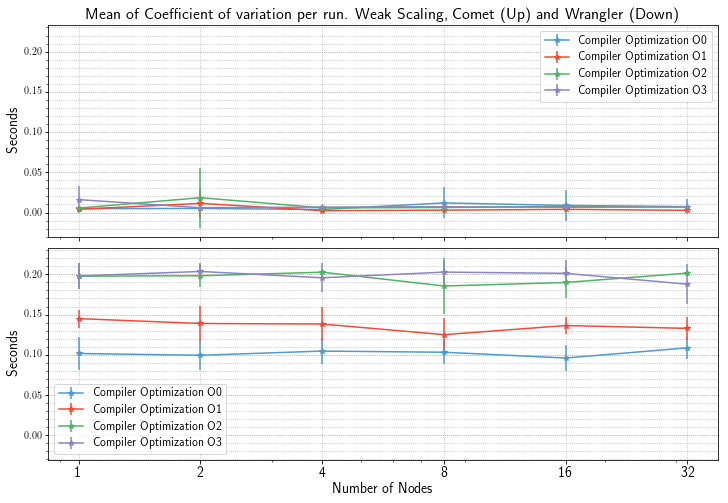

In [10]:
coeffCO0 = task_coeff(dataCO0,nodes=[1,2,4,8,16,32])
coeffCO1 = task_coeff(dataCO1,nodes=[1,2,4,8,16,32])
coeffCO2 = task_coeff(dataCO2,nodes=[1,2,4,8,16,32])
coeffCO3 = task_coeff(dataCO3,nodes=[1,2,4,8,16,32])
coeffWO0 = task_coeff(dataWO0,nodes=[1,2,4,8,16,32])
coeffWO1 = task_coeff(dataWO1,nodes=[1,2,4,8,16,32])
coeffWO2 = task_coeff(dataWO2,nodes=[1,2,4,8,16,32])
coeffWO3 = task_coeff(dataWO3,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO0],yerr=[np.std(D) for D in coeffCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO1],yerr=[np.std(D) for D in coeffCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO2],yerr=[np.std(D) for D in coeffCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO3],yerr=[np.std(D) for D in coeffCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO0],yerr=[np.std(D) for D in coeffWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO1],yerr=[np.std(D) for D in coeffWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO2],yerr=[np.std(D) for D in coeffWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO3],yerr=[np.std(D) for D in coeffWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean of Coefficient of variation per run. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)